In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## SGDClassifier

In [2]:
df = pd.read_csv('resultados1-2.csv')
df.drop(df.columns[0], axis = 1, inplace=True)

In [3]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_learning_rate,param_eta0,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.526750,0.299260,0.010460,0.000334,log,constant,0.1,0.000001,"{'loss': 'log', 'learning_rate': 'constant', '...",0.541560,0.525256,0.551151,0.551364,0.558184,0.545503,0.011424,24
1,4.639807,0.085516,0.009900,0.000155,modified_huber,constant,1.0,0.100000,"{'loss': 'modified_huber', 'learning_rate': 'c...",0.196398,0.135443,0.120418,0.181373,0.130754,0.152877,0.030176,80
2,32.057016,0.492444,0.009528,0.000164,hinge,optimal,0.1,0.000001,"{'loss': 'hinge', 'learning_rate': 'optimal', ...",0.507353,0.495844,0.472506,0.513214,0.503730,0.498529,0.014177,32
3,12.077676,0.599303,0.008987,0.000422,log,optimal,10.0,0.010000,"{'loss': 'log', 'learning_rate': 'optimal', 'e...",0.501598,0.490835,0.496483,0.484228,0.498934,0.494416,0.006211,34
4,75.136969,11.732443,0.008737,0.000111,squared_loss,invscaling,100.0,0.000001,"{'loss': 'squared_loss', 'learning_rate': 'inv...",0.039962,0.024084,0.025256,0.020141,0.015026,0.024893,0.008340,98


In [4]:
df[df['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_learning_rate,param_eta0,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
62,78.931039,0.471676,0.007857,0.000054,log,adaptive,100.0,0.0001,"{'loss': 'log', 'learning_rate': 'adaptive', '...",0.645993,0.626918,0.636935,0.640345,0.634165,0.636871,0.006351,1


In [5]:
best = df[df['rank_test_score'] < 11]

In [6]:
columns = ['param_loss','param_alpha','param_learning_rate','param_eta0', 'mean_fit_time', 'mean_test_score']
best = best[columns]

In [7]:
best.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
param_loss,10,3,hinge,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
param_alpha,10,NaN,NaN,NaN,0.0003232,0.000468534,1e-06,1e-05,5.5e-05,0.000775,0.001
param_learning_rate,10,2,adaptive,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
param_eta0,10,NaN,NaN,NaN,213.022,415.868,0.01,0.1,10,77.5,1000
mean_fit_time,10,NaN,NaN,NaN,48.4622,21.4601,19.5025,35.0133,45.0379,67.3038,78.931
mean_test_score,10,NaN,NaN,NaN,0.620467,0.00962682,0.610465,0.6121,0.617263,0.628367,0.636871


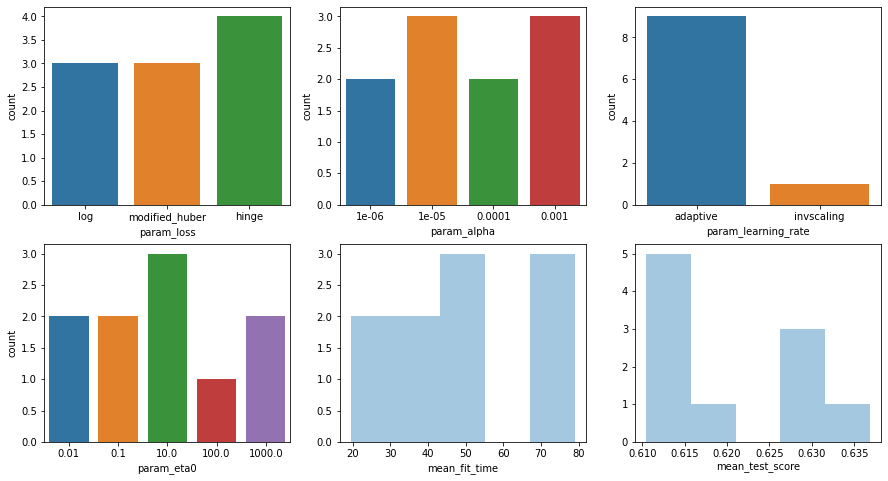

In [8]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.countplot(best.param_loss)
plt.subplot(2,3,2)
sns.countplot(best.param_alpha)
plt.subplot(2,3,3)
sns.countplot(best.param_learning_rate)
plt.subplot(2,3,4)
sns.countplot(best.param_eta0)
plt.subplot(2,3,5)
sns.distplot(best.mean_fit_time, bins = 5, kde = False)
plt.subplot(2,3,6)
sns.distplot(best.mean_test_score, bins = 5, kde = False)

Conclusiones:
1. Las mejores funciones de costo son log y modified_huber
2. Los mejores alpha están entre 1e-6 y 1e-5, más hacia 1e-5
3. El mejor método para el learning_rate es adaptative
4. eta_0 está ubicado cerca de cero

### Random Forest

In [24]:
RF = pd.read_csv('resultados-RF2.csv')
RF.drop(RF.columns[0], axis = 1, inplace=True)

In [25]:
RF.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.243324,0.013630,0.584392,0.004933,gini,1,2,50,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.444048,0.459663,0.457293,0.451786,0.452795,0.453117,0.005374,32
1,12.569033,0.066847,0.917346,0.038617,gini,1,2,100,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.454619,0.465957,0.457692,0.456771,0.456150,0.458238,0.003987,2
2,18.815537,0.049927,1.366383,0.070063,gini,1,2,150,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.449751,0.464567,0.460390,0.455543,0.452214,0.456493,0.005386,12
3,25.310936,0.164068,1.712807,0.052307,gini,1,2,200,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.449055,0.461349,0.460829,0.460215,0.452818,0.456853,0.004988,8
4,31.550060,0.153254,2.049035,0.081211,gini,1,2,250,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.451112,0.464014,0.459768,0.460040,0.451120,0.457211,0.005199,5


In [26]:
RF[RF['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,75.752953,0.428293,4.683753,0.06312,gini,1,2,600,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.454013,0.4634,0.462544,0.457411,0.45501,0.458476,0.003843,1


In [27]:
best_rf = RF[RF['rank_test_score'] <11]

In [28]:
columns = ['param_criterion','param_min_samples_leaf','param_min_samples_split','param_n_estimators', 
           'mean_fit_time', 'mean_test_score']
best_rf = best_rf[columns]

In [29]:
best_rf.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
param_criterion,10,1,gini,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
param_min_samples_leaf,10,NaN,NaN,NaN,1,0,1,1,1,1,1
param_min_samples_split,10,NaN,NaN,NaN,2.2,0.421637,2,2,2,2,3
param_n_estimators,10,NaN,NaN,NaN,415,295.381,100,212.5,275,562.5,1000
mean_fit_time,10,NaN,NaN,NaN,52.1651,37.2927,12.569,26.6754,34.7694,70.9959,126.048
mean_test_score,10,NaN,NaN,NaN,0.457395,0.000695681,0.456647,0.456858,0.457104,0.457978,0.458476


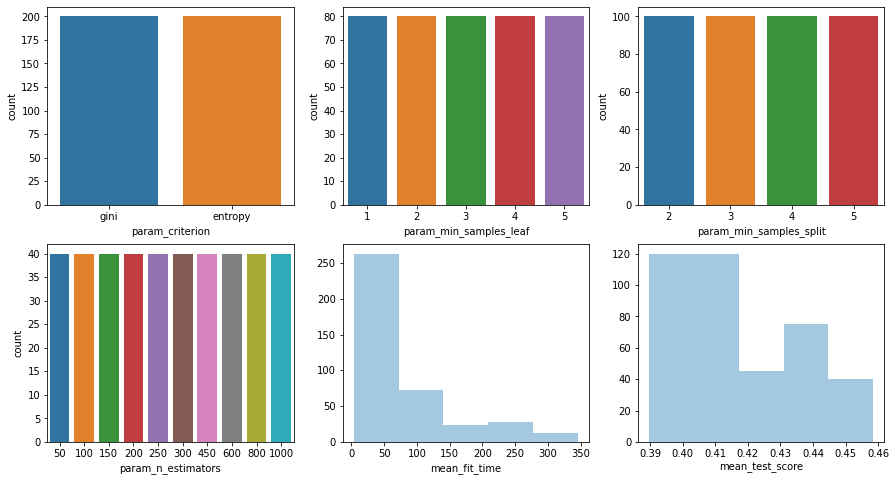

In [30]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.countplot(RF.param_criterion)
plt.subplot(2,3,2)
sns.countplot(RF.param_min_samples_leaf)
plt.subplot(2,3,3)
sns.countplot(RF.param_min_samples_split)
plt.subplot(2,3,4)
sns.countplot(RF.param_n_estimators)
plt.subplot(2,3,5)
sns.distplot(RF.mean_fit_time, bins=5, kde = False)
plt.subplot(2,3,6)
sns.distplot(RF.mean_test_score, bins=5, kde = False)